In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('telco_cleaned.csv')
# 💡 Visa dataset-information
print("Form:", df.shape)
print("\nDatatyper:")
print(df.dtypes)
print("\nBeskrivning av numeriska kolumner:")
print(df.describe())

# 📊 Fördelning av Churn (target)
print("\nFördelning av Churn:")
print(df['Churn'].value_counts(normalize=True))


Form: (7032, 31)

Datatyper:
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                    

Korrelationsmatris

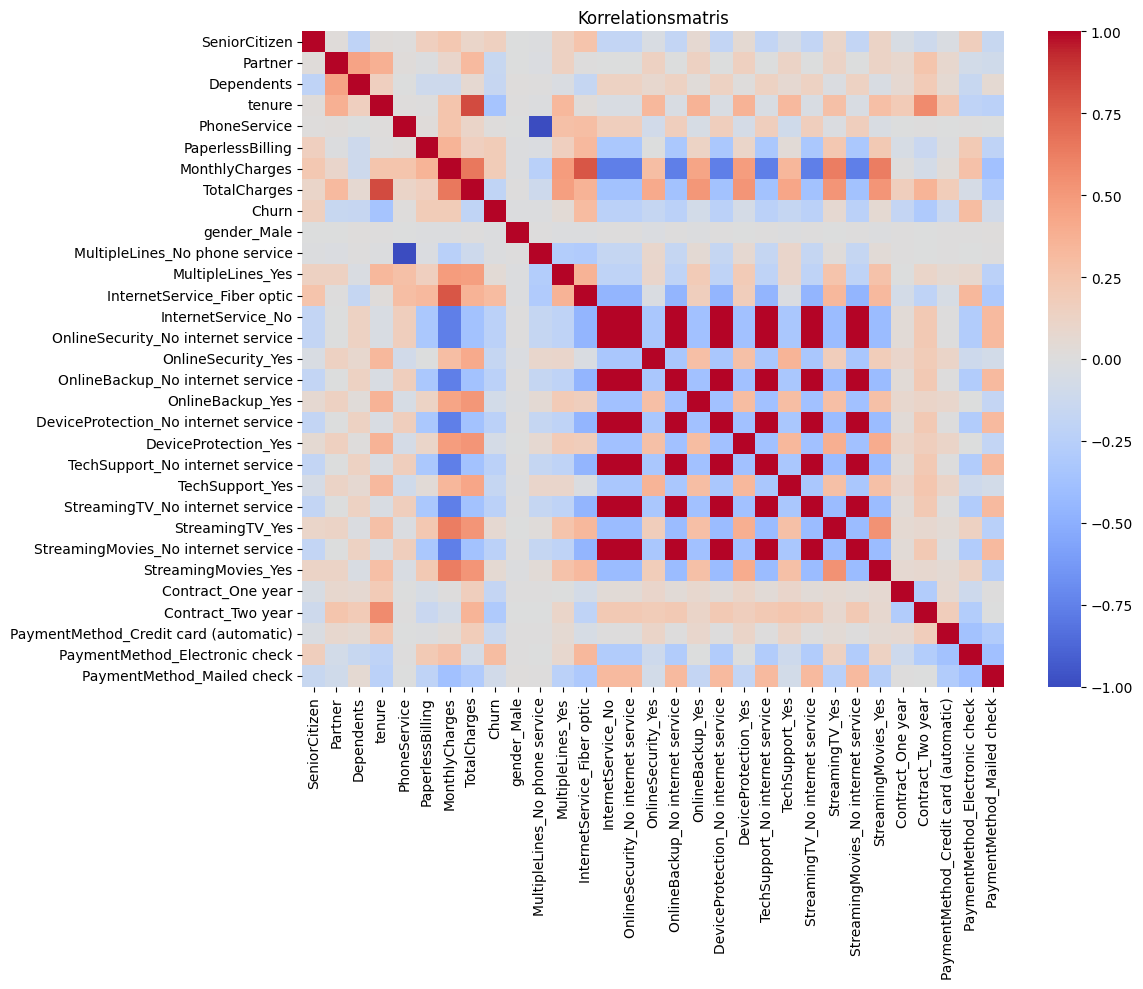

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Korrelationsmatris")
plt.tight_layout()
plt.show()

Churn har negativ korrelation med:

Contract_Two year och Contract_One year → alltså, längre kontrakt minskar churn.

Churn har positiv korrelation med:

MonthlyCharges → kunder med högre månadskostnader tenderar att lämna oftare.

InternetService_Fiber optic → Fiber optic-kunder lämnar oftare än DSL eller ingen internet.

TotalCharges korrelerar starkt med tenure (logiskt: ju längre du stannar, desto mer betalar du totalt).

Histogram

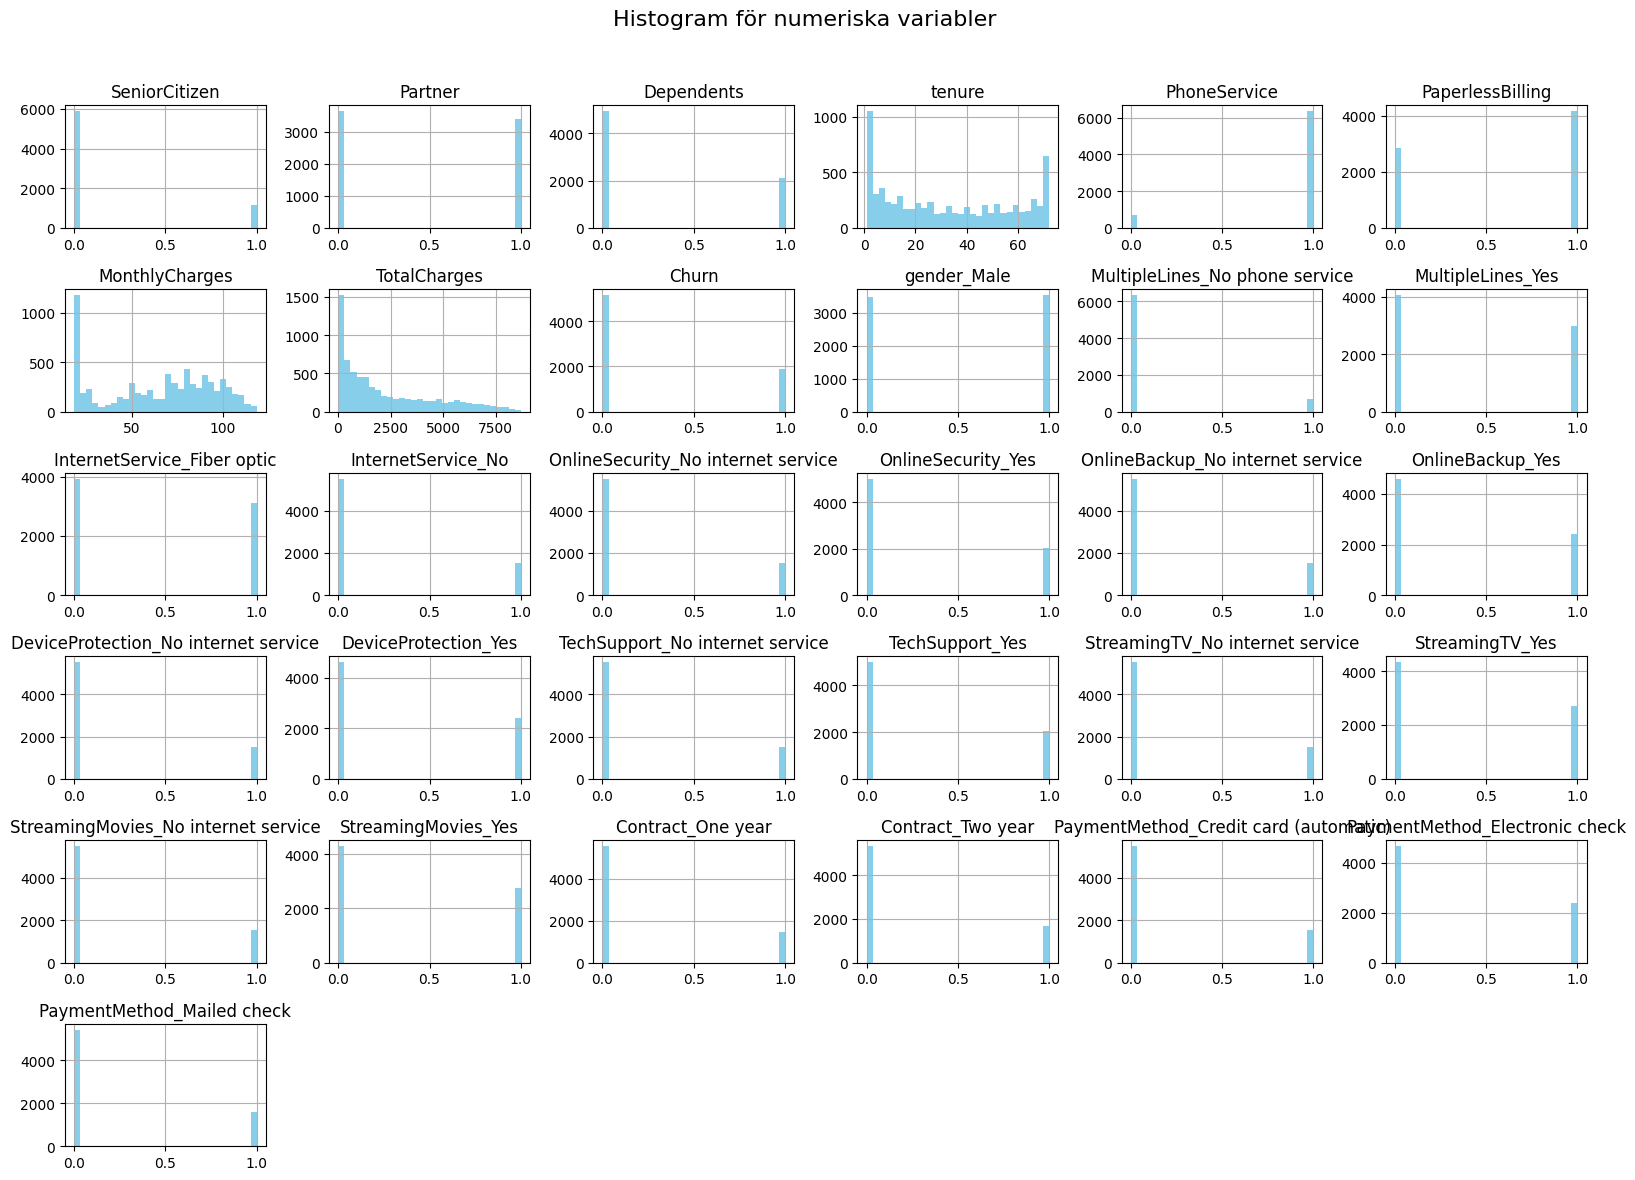

In [5]:
df.hist(bins=30, figsize=(16, 12), color='skyblue')
plt.suptitle("Histogram för numeriska variabler", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Viktiga insikter:
Många variabler (t.ex. SeniorCitizen, Partner, OnlineSecurity_Yes) är binära.

MonthlyCharges har ganska jämn fördelning men fler kunder i lägre prisnivåer (20–50).

TotalCharges är höger-skev – de flesta kunder har låga totalkostnader (nyare kunder).

tenure (hur länge kund varit kvar) visar att många kunder lämnar tidigt (0–10 månader).

Boxplots (Churn vs avgifter)
Jämförelse av TotalCharges och MonthlyCharges mellan kunder som lämnar (Churn = 1) och de som stannar (Churn = 0).

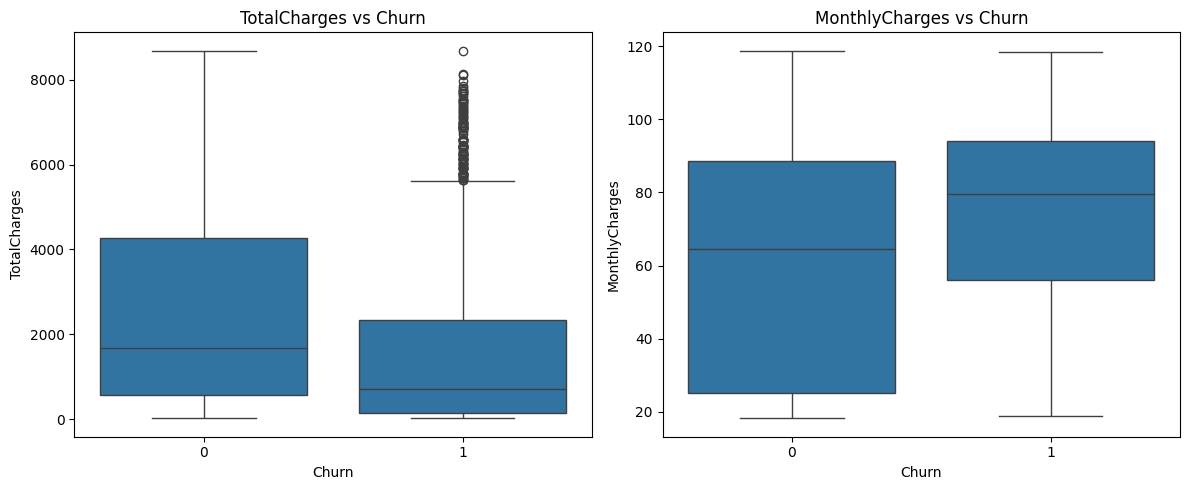

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('TotalCharges vs Churn')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs Churn')

plt.tight_layout()
plt.show()

TotalCharges:

De som stannar (Churn=0) har betydligt högre totalavgifter → de har varit kund längre.

De som lämnar har lägre totalavgifter → troligen nya kunder som hoppar av tidigt.

MonthlyCharges:

De som lämnar har i snitt högre månadskostnader.

Hög kostnad kan vara en orsak till att de lämnar.

Sammanfattning till EDA:
Kunder med högre månadskostnad lämnar oftare, speciellt de som har Fiber optic och saknar säkerhetstjänster.
Kunder som stannar länge har ofta längre kontrakt och betalar mer totalt.
Viktigt för företaget att identifiera högrisk-kunder tidigt – erbjud rabatter, längre kontrakt eller kundsupport!